# Introduction
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

# Stage 1: Questions and Goals
#### Stakeholders:  
 **Lily Moreno** : The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.  
 **Cyclistic marketing analytics team** : A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.  
 **Cyclistic executive team** : The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.  
#### Questions:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual membership?
3. How can Cyclistic use digital media to influence casual riders to become members?

# Stage 2: Prepare
**Data**: [click here](https://divvy-tripdata.s3.amazonaws.com/index.html)  
**Licence**: [click here](https://www.divvybikes.com/data-license-agreement)  
**Description**: The data contains raw information about the customers using Cyclistic services in 2019.  
**Problems**:  
* Some columns contain incorrect format
* Some columns contain empty cells  

All the problems will be handled during cleaning and the description will be provided in stage 3.

# Stage 3: Cleaning
### 3.1 Uploading and processing the data
During this case study the common libraries will be used, namely `pandas` (working with data frames), `numpy` (data structures and math operations), `matplotlib` and `seaborn` (both for data visualization)

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Creating data frames
df1 = pd.read_csv('~/Downloads//cyclistic/202101-divvy-tripdata.csv')
df2 = pd.read_csv('~/Downloads//cyclistic/202102-divvy-tripdata.csv')
df3 = pd.read_csv('~/Downloads//cyclistic/202103-divvy-tripdata.csv')
df4 = pd.read_csv('~/Downloads//cyclistic/202104-divvy-tripdata.csv')
df5 = pd.read_csv('~/Downloads//cyclistic/202105-divvy-tripdata.csv')
df6 = pd.read_csv('~/Downloads//cyclistic/202106-divvy-tripdata.csv')
df7 = pd.read_csv('~/Downloads//cyclistic/202107-divvy-tripdata.csv')
df8 = pd.read_csv('~/Downloads//cyclistic/202108-divvy-tripdata.csv')

# Merging data frames (SQL-like union)
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df.reset_index(drop=True, inplace=True)
df.head(4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member


### 3.2 Handling empty values
The table below shows that the data frame contains cells in `start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `end_lat`, and `end_lng` columns. Since I am not able to find the information about latitude and longitude, the rows will be deleted. The information in the rest of the columns is not crucial, so the empty cells will be replaced with `0` and `Unknown` values.

In [2]:
# Visualization of empty rows
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    363133
start_station_id      363132
end_station_name      392390
end_station_id        392390
start_lat                  0
start_lng                  0
end_lat                 3357
end_lng                 3357
member_casual              0
dtype: int64

In [3]:
 # Filling the empty values
for i in df:
    if i in ['start_station_name', 'end_station_name']:
        df[i] = df[i].fillna('Unknown')
    elif i in ['start_station_id', 'end_station_id']:
        df[i] = df[i].fillna(0)
    elif i in ['end_lat', 'end_lng']:
        df.dropna(subset=['end_lat', 'end_lng'], inplace=True)

# Checking empty values after cleaning        
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

### 3.3 Incorrect data types
Columns `started_at` and `ended_at` represent timestamps during which the service was provided, however these columns have data type `string`. I am going to convert them to `datetime64` type.

In [4]:
# Existing data types
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
# Changing the data types
for i in df:
    if i in ['started_at', 'ended_at']:
        df[i] = pd.to_datetime(df[i])

# Checking data types after cleaning
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [6]:
# Total number of rows
df.count()[0]

3596815

# Stage 4: Analysis
Next, I will be performing data transformation and visualization. All the conclusions will be summarized in the section **4.5**.

### 4.1 Additional calculations
I am going to calculate parameters that are not in the data frame, but will be very useful during the analysis process.  
Parameter `duration_minutes` is calculated by subtracting time when a ride was ended and starting time:

In [7]:
# Inserting a new column showing duration of a ride in minutes
duration = df['ended_at'] - df['started_at']
df.insert(4, 'duration_minutes', np.round(duration.dt.seconds/60, 1))

The new column `start_date` will be useful to represent changing overtime. Basically, I am going to change the format of the `started_at` parameter to a standard year-month-day type:

In [8]:
# Inserting a new column showing a start date
start_date = pd.to_datetime(df['started_at']).dt.date
df.insert(2, 'start_date', start_date)
df['start_date'] = pd.to_datetime(df['start_date'])

Having latitude and longitude parameters allow us to calculate the distance between starting point and destination by creating a custom function.
The result of the function will be represented in kilometers and can be checked [here](https://www.meridianoutpost.com/resources/etools/calculators/calculator-latitude-longitude-distance.php?).

In [9]:
# Create a function to calculate the distance between two points
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    All args must be of equal length.    
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    
    return km

# Add new column with the distance between points
distance_km = haversine_np(df['start_lng'], df['start_lat'], df['end_lng'], df['end_lat'])
df.insert(10, 'distance_km', distance_km)

Identifying a day of a week according to `start_date` can be useful when visualizing the distribution of the rides between week days:

In [10]:
# Add weekday column
day_of_week = df['start_date'].dt.day_name()
df.insert(3, 'day_of_week', df['start_date'].dt.day_name())

Quick check the updated data frame and its data types:

In [11]:
# Quick check all new columns have been added
df.sample(5)

,ride_id,rideable_type,start_date,day_of_week,started_at,ended_at,duration_minutes,start_station_name,start_station_id,end_station_name,end_station_id,distance_km,start_lat,start_lng,end_lat,end_lng,member_casual
653484,13512332293BBA25,electric_bike,2021-04-27,Tuesday,2021-04-27 20:05:09,2021-04-27 21:01:59,56.8,Campbell Ave & Fullerton Ave,15648,Western Ave & Congress Pkwy,15668,5.557863,41.924634,-87.689303,41.874666,-87.686413,member
2239629,94DC9738E2FCA98D,docked_bike,2021-07-19,Monday,2021-07-19 16:14:21,2021-07-19 16:49:08,34.8,Fairbanks Ct & Grand Ave,TA1305000003,Cityfront Plaza Dr & Pioneer Ct,13427,0.187820,41.891847,-87.620580,41.890573,-87.622072,casual
2947681,A7AF9BF34E953288,classic_bike,2021-08-08,Sunday,2021-08-08 10:43:08,2021-08-08 11:25:32,42.4,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,0.000000,41.926277,-87.630834,41.926277,-87.630834,casual
2775747,7C933FD31449680A,electric_bike,2021-07-03,Saturday,2021-07-03 08:01:34,2021-07-03 08:08:00,6.4,Unknown,0,Unknown,0,1.111251,41.800000,-87.600000,41.790000,-87.600000,casual
1500212,B9C69178E80D8DC0,classic_bike,2021-06-23,Wednesday,2021-06-23 22:49:53,2021-06-23 22:56:23,6.5,Lakeview Ave & Fullerton Pkwy,TA1309000019,Larrabee St & Webster Ave,13193,0.619405,41.925858,-87.638973,41.921822,-87.644140,casual


In [12]:
# Quick check new columns
df.dtypes

ride_id                       object
rideable_type                 object
start_date            datetime64[ns]
day_of_week                   object
started_at            datetime64[ns]
ended_at              datetime64[ns]
duration_minutes             float64
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
distance_km                  float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

### 4.2. Members vs. Casual
In the previous section, we determined that the number of rides between Jan - Aug 2021 is `3,596,815`. The pie chart below shows that **48.1%** of rides were made by casual riders. 

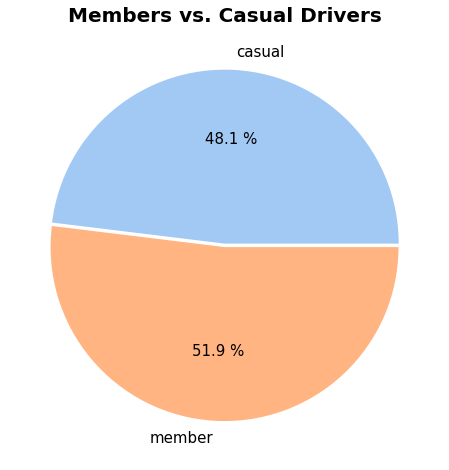

In [13]:
# Data frame grouped by driver type (count)
member = df.groupby('member_casual').count().reset_index(drop=False)[['member_casual', 'ride_id']]

# Parameters
values = [i for i in member['ride_id']]
labels = [j for j in member['member_casual']]
colors = sns.color_palette('pastel')[0:2]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct = '%.1f %%', explode=[0.01, 0.01], textprops={'fontsize': 15})

# Non-data parameters
plt.title('Members vs. Casual Drivers', fontdict={'fontweight':'bold', 'fontsize':20})

plt.show()

### 4.3 Daily distance
Following, the calculation shows that difference between average distance covered daily by members with a subscription and casual members is almost similar (**2.25** km vs. **2.19** km):

In [14]:
# Table with average overall distance
member_avg_distance = df[['member_casual', 'distance_km']].groupby('member_casual').mean()
member_avg_distance.reset_index(drop=False, inplace=True)
member_avg_distance.rename(columns={'member_casual':'Type', 'distance_km':'AVG. Distance'}, inplace=True)
member_avg_distance

,Type,AVG. Distance
0,casual,2.251897
1,member,2.193841


After visualizing the total distance covered daily, we can see the difference: subscribed members use the service for daily similar purposes (commuting) whereas casual members use it mostly as one time trip, but for a longer distance. Additionally, it is clear that the usage in the first quarter is much lower than in the rest of the year. Most likely this pattern is related to weather conditions:

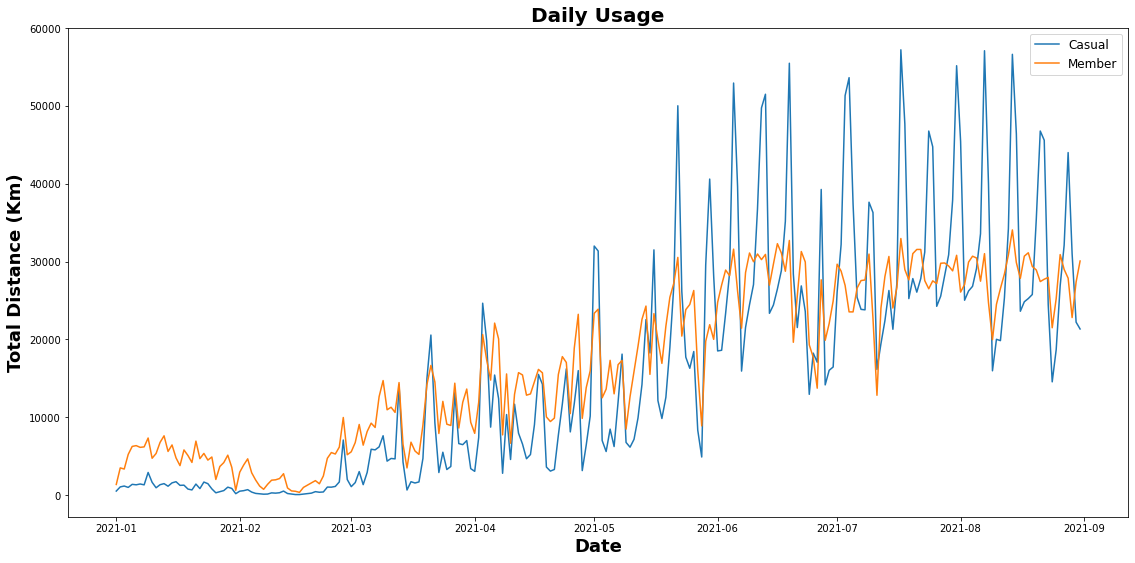

In [15]:
# Total distance daily
member_distance = df[['start_date', 'member_casual', 'distance_km']]
member_distance = member_distance.groupby(['start_date', 'member_casual']).sum()
member_distance.reset_index(drop=False, inplace=True)

# Line plot
plt.figure(figsize=(19, 9))
sns.lineplot(data=member_distance, x='start_date', y='distance_km', hue='member_casual')

# Non-data objects
plt.title('Daily Usage', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Date', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Total Distance (Km)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.legend(['Casual', 'Member'], fontsize=12)

plt.show()

### 4.4 Average duration and distance
In this section I will break down how member groups use the service.  
The next plot shows that unlike subscribers, casual members prefer using a docked type of bikes rather than classic or electric: 

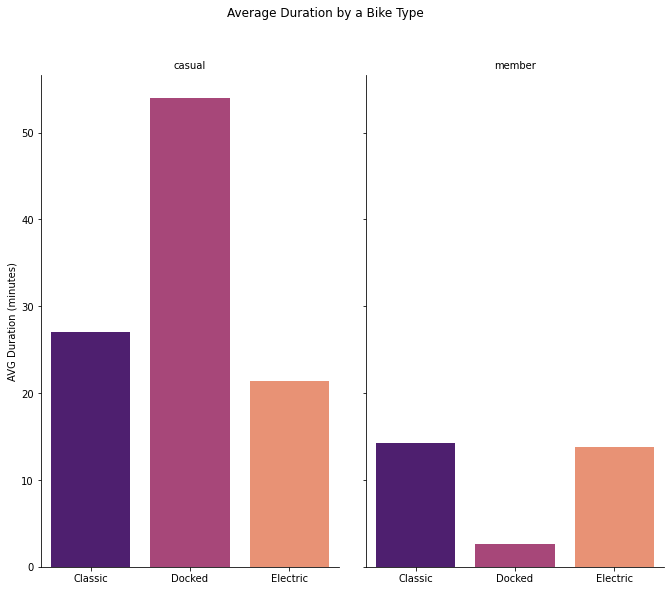

In [16]:
# Creating a data frame
avg_duration = df[['member_casual', 'rideable_type', 'duration_minutes']].groupby(['member_casual', 'rideable_type']).mean()
avg_duration.reset_index(drop=False, inplace=True)

# Barplot (facegrid)
g = sns.FacetGrid(avg_duration, col='member_casual')
g.map(sns.barplot, 'rideable_type', 'duration_minutes', order=['classic_bike', 'docked_bike', 'electric_bike'], palette='magma')

# Non-data parameters
g.fig.suptitle('Average Duration by a Bike Type')
g.fig.set_size_inches(10,10)
g.set_titles(col_template="{col_name}")
g.set_axis_labels('', 'AVG Duration (minutes)')
g.set_xticklabels(['Classic', 'Docked', 'Electric'])

plt.show()

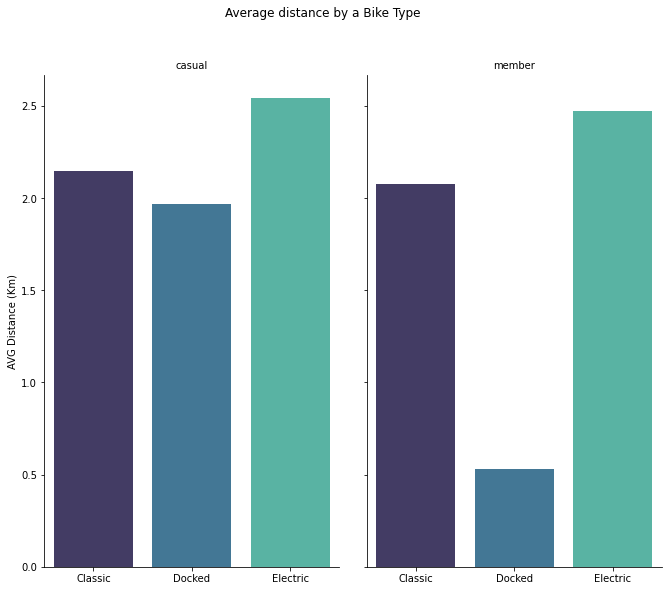

In [17]:
# Casual/Member avg DISTANCE and bike type
avg_distance = df[['member_casual', 'rideable_type', 'distance_km']].groupby(['member_casual', 'rideable_type']).mean()
avg_distance.reset_index(drop=False, inplace=True)

# Barplot (facegrid)
g = sns.FacetGrid(avg_distance, col='member_casual')
g.map(sns.barplot, 'rideable_type', 'distance_km', order=['classic_bike', 'docked_bike', 'electric_bike'], palette='mako')

# Non-data parameters
g.fig.suptitle('Average distance by a Bike Type')
g.fig.set_size_inches(10,10)
g.set_titles(col_template="{col_name}")
g.set_axis_labels('', 'AVG Distance (Km)')
g.set_xticklabels(['Classic', 'Docked', 'Electric'])

plt.show()

The table below allows us to discover that casual members spent as much as twice more time than customers with the membership. Comparing this information with the table from the section **4.3**, brings me to the conclusion that **casual members use the service mostly for entertainment and recreation**.

In [18]:
# Table with average time
member_avg_time = df[['member_casual', 'duration_minutes']].groupby('member_casual').mean()
member_avg_time.reset_index(drop=False, inplace=True)
member_avg_time.rename(columns={'member_casual':'Type', 'duration_minutes':'AVG. Time'}, inplace=True)
member_avg_time

,Type,AVG. Time
0,casual,28.901076
1,member,14.102137


### 4.5 Usage by days
From dividing the data on days of a week, we can see that there is a pattern showing that the casual members are active on weekends and this activity is slightly going down by the middle of a week. This pattern is not so explicit when it comes to subscribed members:

In [19]:
test = df[['day_of_week', 'member_casual', 'duration_minutes', 'distance_km']]
test = test.groupby(['day_of_week', 'member_casual']).mean()
test.reset_index(drop=False, inplace=True)

# Changing order or week days
weekdays =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
test['day_of_week'] = pd.Categorical(test['day_of_week'], categories=weekdays, ordered=True)

# test['day_of_week'] - check type changed
# test.sort_values('day_of_week')

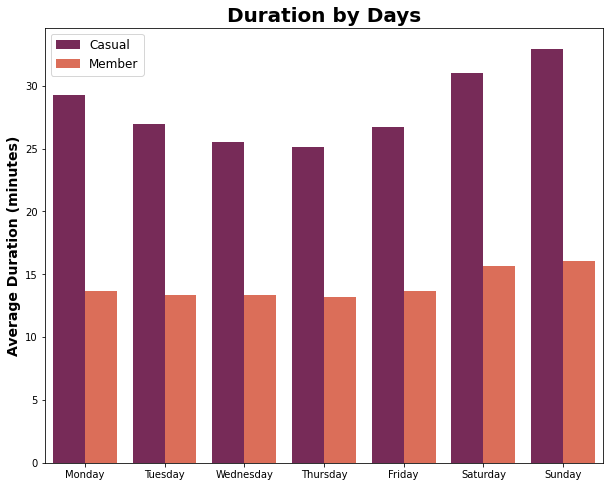

In [20]:
# Grouped Barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=test, 
            x="day_of_week", 
            y='duration_minutes', 
            hue='member_casual', 
            ci=None, 
            palette='rocket')

# Non-data parameters
plt.title('Duration by Days', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('')
plt.ylabel('Average Duration (minutes)', fontdict={'fontweight':'bold', 'fontsize':14})
plt.legend(['Casual', 'Member'], fontsize=12)

plt.show()

### 4.6 Impacts

Bike-share programs generate a number of economic externalities, both positive and negative. The positive externalities include reduction of traffic congestion and pollution, while the negative externalities can include degradation of urban aesthetic environment and reduction of parking.

**Less traffic congestion**  
A primary goal of bicycle-sharing systems has been to reduce traffic congestion, particularly in large urban areas. Some empirical evidence indicates that this goal has been achieved to varying degrees in different cities

**Less pollution**  
Not only do bike-share systems intend to reduce traffic congestion, they also aim to reduce air pollution through decreased automobile usage, and indirectly through the reduction of congestion.

**Healthy transport**  
Bicycle-sharing systems have been shown to have a strong net positive health effect. Cycling is a good way for exercise and stress relief. It can increase recreation and improve sociability of a city, which make people live more happy and relaxed.

[Source](https://en.wikipedia.org/wiki/Bicycle-sharing_system)

# Stage 5: Share

### 5.1 Recap
Considering that the customer base of the company is divided 50/50, there are some differences in customer behavior:
* Casual customers spend much more time using the service than the members
* Casual customers cover more distance
* Activity in the first quarter of a year is much lower
* Docked type of a bike is much more popular among casual customers
* Weekend is the most active period

### 5.2 Recommendations
* Cyclistic have managed to create a business model that accommodates a variety of customer needs whether it is work or travel. However, aiming the business strategy towards tourism and entertainment aspects could encourage casual members to consider buying membership. 

* Cyclistic can use digital media to influence casual riders to become members by telling about positive impacts that bike-sharing program provides. Customers can be attracted by ideas of helping to support a healthy lifestyle, improve air quality, reduce traffic and congestion.